In [34]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sma

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df = pd.read_csv('data/sample_data2.csv')
X = df[['space', 'age']]
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
pd.DataFrame(X_scaler, columns=X.columns)

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


## t検定とP値の値を出力

In [18]:
# 特徴量の標準化なしで出力
y = df['rent']
x = df[['age', 'space']]

x = sma.add_constant(x)
est = sma.OLS(y, x)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           0.000282
Time:                        16:52:38   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


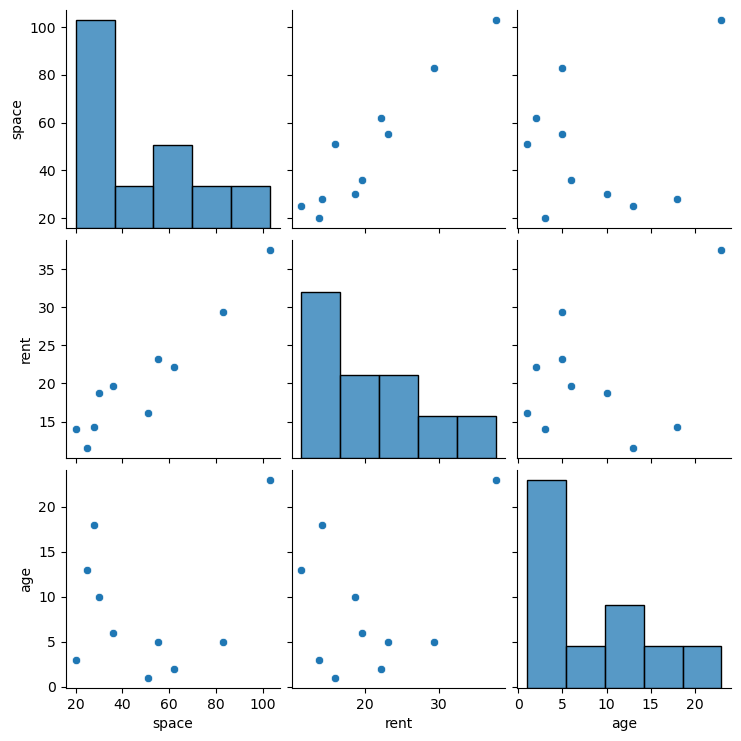

In [29]:
sns.pairplot(df)

In [27]:
# 特徴量を標準化
x = df[['age', 'space']]
scaler = StandardScaler()
X_scaler = scaler.fit_transform(x)
x = sma.add_constant(pd.DataFrame(X_scaler))
est = sma.OLS(y, x)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           0.000282
Time:                        16:58:16   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ダミー変数

In [33]:
df = pd.read_csv('data/sample_data3.csv')
pd.get_dummies(df, drop_first=True)

,space,rent,age,facing_direction_North,facing_direction_South,facing_direction_West
0,20,13.958824,3,0,1,0
1,25,11.533805,13,0,1,0
2,28,14.269547,18,1,0,0
3,30,18.722680,10,0,0,1
4,36,19.602674,6,0,0,1
5,51,16.068166,1,0,1,0
6,55,23.183599,5,0,0,0
7,62,22.212595,2,1,0,0
8,83,29.357010,5,1,0,0
9,103,37.565129,23,0,0,1


In [32]:
df.head()

,space,rent,age,facing_direction
0,20,13.958824,3,South
1,25,11.533805,13,South
2,28,14.269547,18,North
3,30,18.722680,10,West
4,36,19.602674,6,West
